In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA


In [2]:
raw_url="Nat_Gas.csv"
Gas_price_data = pd.read_csv(raw_url)
Gas_price_data['Dates'] = pd.to_datetime(Gas_price_data['Dates'])
Gas_price_data.set_index('Dates', inplace=True)
Gas_price_data.head()

C:\Users\lky24\AppData\Local\Temp\ipykernel_3364\3567829250.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Gas_price_data['Dates'] = pd.to_datetime(Gas_price_data['Dates'])


,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


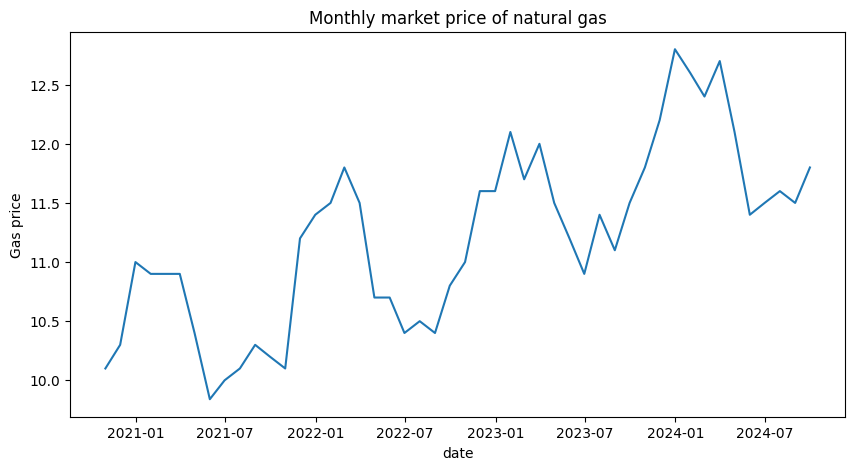

In [3]:
plt.figure(figsize=(10,5))
plt.plot(Gas_price_data)
plt.title("Monthly market price of natural gas")
plt.xlabel("date")
plt.ylabel("Gas price")

plt.show()

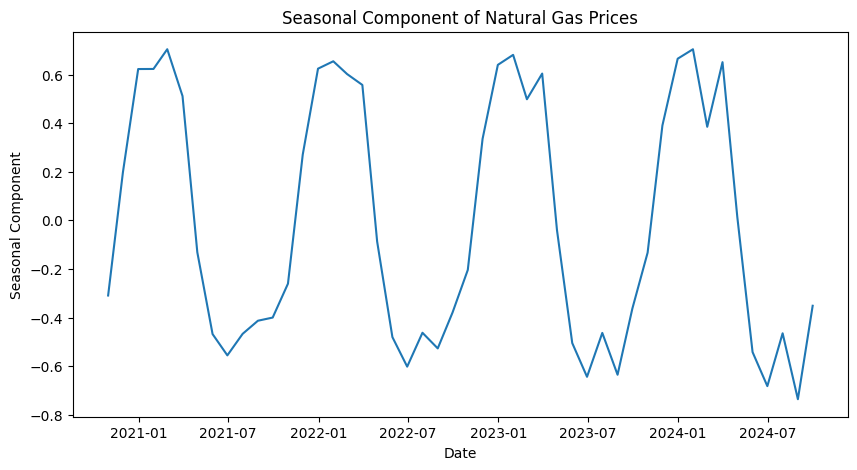

In [4]:
stl = STL(Gas_price_data['Prices'], seasonal=13)  # The seasonal parameter is set to 13 for monthly data
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

#Visualize the seasonal component
plt.figure(figsize=(10, 5))
plt.plot(seasonal)
plt.title('Seasonal Component of Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.show()

In [5]:
#Fitting the ARIMA model
model = ARIMA(Gas_price_data, order=(1, 1, 1))  # (p, d, q) order
model_fit = model.fit()

#Estimate prices for a given date and extrapolate for one year
def estimate_price(date):

    forecast = model_fit.forecast(steps=12)
    price = forecast.loc[date]
    return price

# Example usage
date_to_estimate = pd.to_datetime('2024-12-31')
estimated_price = estimate_price(date_to_estimate)
print(f"Estimated price on {date_to_estimate.date()}: {estimated_price:.2f}")

Estimated price on 2024-12-31: 11.84


C:\Users\lky24\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\lky24\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\lky24\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
